Importing Libraries And Packages

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

Loading Full_Face Dataset and Exploring

In [4]:
closed_path = "C:/Users/Viraj Sawant/OneDrive/Desktop/Drowsiness Detector/ClosedFace"
open_path = "C:/Users/Viraj Sawant/OneDrive/Desktop/Drowsiness Detector/OpenFace"



In [5]:
# Image size (CNN input size)
IMG_SIZE = 24  # You can change to 32 or 48 depending on model complexity

data = []
labels = []

In [6]:
# Load closed eye images
for filename in os.listdir(closed_path):
    path = os.path.join(closed_path, filename)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(0)  # Closed = 0


In [7]:
# Load open eye images
for filename in os.listdir(open_path):
    path = os.path.join(open_path, filename)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(1)  # Open = 1

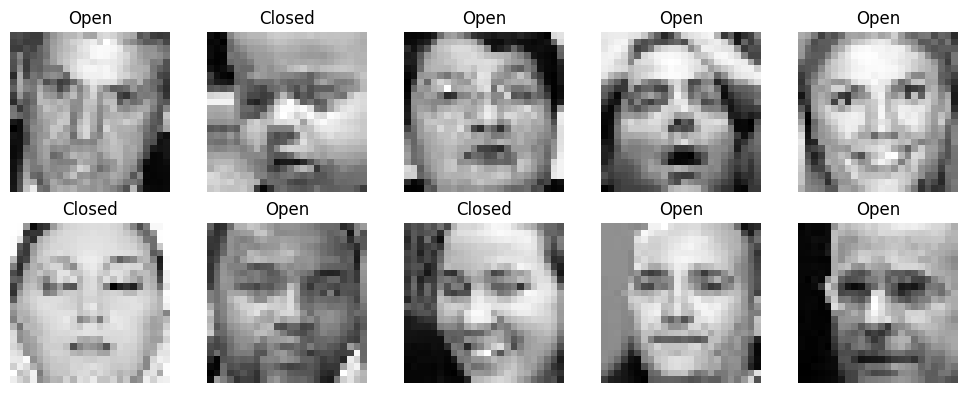

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    idx = np.random.randint(0, len(data))
    plt.subplot(2, 5, i+1)
    plt.imshow(data[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title("Closed" if labels[idx] == 0 else "Open")
    plt.axis('off')
plt.tight_layout()
plt.show()


Building CNN Model for Training The Dataset



In [9]:
data_dir = "Dataset"

In [10]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1939 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [11]:
# === CNN model ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # for binary classification
])

c:\Users\Viraj Sawant\OneDrive\Desktop\Drowsiness Detector\dr\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# === Train ===
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

c:\Users\Viraj Sawant\OneDrive\Desktop\Drowsiness Detector\dr\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.5346 - loss: 0.6885 - val_accuracy: 0.6715 - val_loss: 0.6549
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.6335 - loss: 0.6490 - val_accuracy: 0.6694 - val_loss: 0.5941
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.6836 - loss: 0.5948 - val_accuracy: 0.6674 - val_loss: 0.5762
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.7342 - loss: 0.5094 - val_accuracy: 0.8140 - val_loss: 0.4296
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.7878 - loss: 0.4406 - val_accuracy: 0.8306 - val_loss: 0.3996
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.8500 - loss: 0.3691 - val_accuracy: 0.8471 - val_loss: 0.3474
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.8708 - loss: 0.2993 - val_accuracy: 0.8781 - val_loss: 0.2991
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.8943 - loss: 0.2533 - val_accuracy

In [14]:
# === Save the model ===
model.save("face_eye_status_model.h5")

Plotting Accuracy

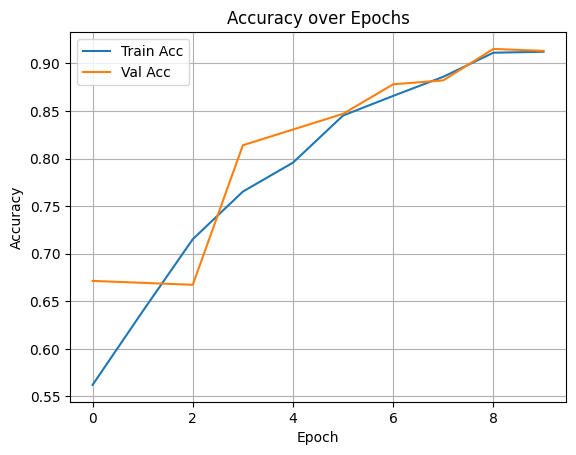

In [15]:
# === Plot Accuracy ===
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [16]:
# Evaluate model on validation set
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9405 - loss: 0.1888 
Validation Accuracy: 91.94%


[INFO] Detected 2 face(s)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Face 1: Open (Confidence: 0.97)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Face 2: Open (Confidence: 0.93)

[SUMMARY]
People Awake: 2
People Asleep: 0


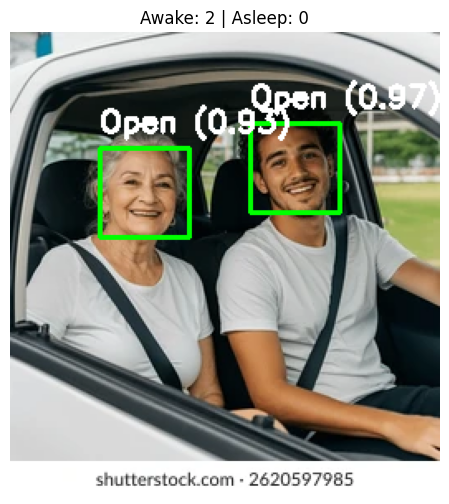

In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# === Load model ===
model = load_model("face_eye_status_model.h5")

# === Labels ===
eye_labels = ['Closed', 'Open']

# === Load Haar Cascade ===
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# === Load image ===
image_path = "Car.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === Detect faces ===
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

print(f"[INFO] Detected {len(faces)} face(s)")

asleep_count = 0
awake_count = 0

# === Loop through detected faces ===
for idx, (x, y, w, h) in enumerate(faces):
    # Crop, resize, normalize
    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (64, 64))
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = face / 255.0
    face = np.expand_dims(face, axis=0)

    # Predict
    prob = model.predict(face)[0][0]
    pred = 1 if prob > 0.5 else 0
    label = eye_labels[pred]

    # Count awake/asleep
    if label == 'Closed':
        asleep_count += 1
    else:
        awake_count += 1

    # Annotate the image
    color = (0, 255, 0) if label == 'Open' else (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img, f"{label} ({prob:.2f})", (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    print(f"Face {idx+1}: {label} (Confidence: {prob:.2f})")

# === Summary ===
print("\n[SUMMARY]")
print(f"People Awake: {awake_count}")
print(f"People Asleep: {asleep_count}")

# === Show image ===
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title(f"Awake: {awake_count} | Asleep: {asleep_count}")
plt.axis('off')
plt.show()


Saving The Model

In [18]:
# === Save the model ===
model.save("face_eye_status_model.h5")

In [19]:
model.save_weights("eye.weights.h5")


In [20]:
print("Train Accuracy:", history.history['accuracy'][-1])
print("Val Accuracy:", history.history['val_accuracy'][-1])


Train Accuracy: 0.912325918674469
Val Accuracy: 0.913223147392273
